<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[22차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 딥러닝 기반 얼굴 추출 알고리즘에 대해 이해하고 사용할 수 있다.<br><br>
○ 딥러닝 기반 얼굴 인식 알고리즘에 대해 이해하고 사용할 수 있다.        
        </font></td></tr>   
</table>

# 딥러닝 기반 얼굴 추출

## SSD (Single Shot Dectector)
- 2015년 발표
- 다른 모델은 객체 감지를 위해 이미지를 2번 이상 반복하는 것에 반해 1번만으로 객체 감지
- 백본 모델(피쳐 맵 추출기로 작동하는 일반적인 사전 학습된 이미지 분류 네트워크)과 SSD 헤드(두 개의 컨볼루션 레이어로 구성, 바운딩박스 출력)로 구성

- 참고 : https://github.com/amdegroot/ssd.pytorch

## MTCNN (Multi-Task Cascaded Convolutional Neural Network)

- 2016년 4월 발표
- 3단계의 CNN으로 구성
  - P-Net (Proposed Net) : 얕은 CNN을 통해 후보 창을 신속하게 생성
  - R-Net (Refine Net) : 더 복잡한 CNN을 통해 많은 수의 얼굴이 아닌 바운딩 박스를 제외하여 구체화
  - O-Net (Output Net) : 강력한 CNN을 사용하여 결과를 구체화하고 다섯 개의 얼굴 랜드 마크 위치를 출력

- 논문 : https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf
- 참고 : https://github.com/ipazc/mtcnn

  
<img src="./lecture_image/22_mtcnn.jpg" width="30%">    

In [14]:
!pip install mtcnn

  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)


1/1 [==============================] - 0s 113ms/step
[{'box': [172, 85, 217, 297], 'confidence': 0.9999829530715942, 'keypoints': {'left_eye': (263, 197), 'right_eye': (358, 220), 'nose': (314, 266), 'mouth_left': (257, 311), 'mouth_right': (324, 325)}}]


(-0.5, 519.5, 692.5, -0.5)

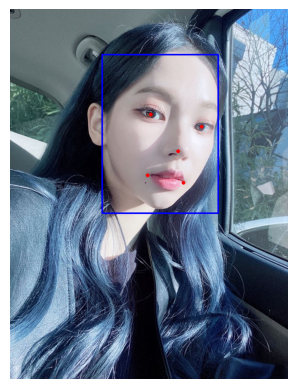

In [13]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

detector = MTCNN()

img = cv2.imread("./image/carina.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 영역 검출 (x, y, w, h)
faces = detector.detect_faces(img)

print(faces)
for face in faces:
    if face["confidence"]> 0.7:
        x, y, w, h =face["box"]
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),2)
        
        keypoints = face["keypoints"]
        cv2.circle(img, keypoints["left_eye"], 2, (255,0,0),2)
        cv2.circle(img, keypoints["right_eye"], 2, (255,0,0),2)
        cv2.circle(img, keypoints["nose"], 2, (255,0,0),2)
        cv2.circle(img, keypoints["mouth_left"], 2, (255,0,0),2)
        cv2.circle(img, keypoints["mouth_right"], 2, (255,0,0),2)
        
plt.imshow(img)
plt.axis("off")

## DSFD (Dual Shot Face Dectector)

- 2019년 4월 발표
- 2개의 스트림 형태로 구성
- 논문 : https://arxiv.org/abs/1810.10220
- 참고 : https://github.com/yxlijun/DSFD.pytorch
- face_detection 참고 : https://pypi.org/project/face-detection/

<img src="./lecture_image/22_dsfd.png" width="50%">    


In [1]:
!pip install face_detection

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 161.9/161.9 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.3 MB/s eta 0:00:00
  Created wheel for face_detection: filename=face_detection-0.2.2-py3-none-any.whl size=25562 sha256=3cb5ccb9527b88c6e7eeb1425adb1be6ac96c95f00ac80d1f3f03c3ef90e3429
  Stored in directory: c:\users\ai\appdata\local\pip\cache\wheels\dd\2d\84\c7a9ce1760b00f8b1d431c9564b108acfb98f588c18d4a1a9c
Successfully built face_detection


<img src="./lecture_image/22_iou.png" width="50%">  

In [24]:
import face_detection
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./image/faces4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 정확도 50% 이상 IoU는 30% 이상인 경우에만 검출
detector = face_detection.build_detector("DSFDDetector",
                                          confidence_threshold=0.5,
                                          nms_iou_threshold=0.3)
# 얼굴 영역 반환 (x1, y1, x2,y2 정확도)
faces = detector.detect(img)

print(faces)

for (x1, y1, x2, y2, conf) in faces:
    if conf >= 0.9:
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)),
                      (255,0,0),2)

C:\Users\AI\.conda\envs\opencv\lib\site-packages\torch\amp\autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[[261.18024    313.50018    359.94156    459.69687      0.9999831 ]
 [147.36313    278.79       249.07481    404.43637      0.99986625]
 [419.23477      4.493914   548.57184    177.78537      0.9998646 ]
 [264.03622     38.828636   398.19836    196.08127      0.9998636 ]
 [378.72552    315.16043    503.47626    438.31943      0.99981636]
 [421.2494     184.62941    575.1961     299.27         0.99649435]
 [187.32916    192.98296    333.93198    303.36743      0.994327  ]]


## RetinaFace

- 2019년 5월 발표
- 성능이 매우 우수한 얼굴인식기 (mxnet 기반)
- 참고 : https://github.com/serengil/retinaface

In [1]:
!pip install retina-face

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 78.5/78.5 kB 2.1 MB/s eta 0:00:00
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=75421a5d1d1d62456664a7d9f69589ccddb7bcb4990a0c6681e31f4dd1909f21
  Stored in directory: c:\users\ai\appdata\local\pip\cache\wheels\3d\ec\b0\a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown


In [9]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("./image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 얼굴 검출 (정확도, 얼굴영역, 랜드마크점 5개)
faces = RetinaFace.detect_faces(img)
print(faces)

{'face_1': {'score': 0.9999127388000488, 'facial_area': [422, 174, 600, 297], 'landmarks': {'right_eye': [489.30478, 277.76996], 'left_eye': [486.68933, 208.73875], 'nose': [522.9407, 234.19261], 'mouth_right': [562.9965, 257.4505], 'mouth_left': [562.3928, 204.11429]}}, 'face_2': {'score': 0.9998443126678467, 'facial_area': [267, 23, 395, 218], 'landmarks': {'right_eye': [330.408, 135.88634], 'left_eye': [330.0788, 144.71771], 'nose': [321.6927, 109.2608], 'mouth_right': [317.6721, 68.46927], 'mouth_left': [319.8279, 75.01438]}}, 'face_3': {'score': 0.9995494484901428, 'facial_area': [383, 315, 513, 443], 'landmarks': {'right_eye': [418.78534, 391.77414], 'left_eye': [456.98602, 352.24792], 'nose': [458.53223, 388.442], 'mouth_right': [464.58673, 424.17264], 'mouth_left': [494.23145, 392.72327]}}, 'face_4': {'score': 0.9992232322692871, 'facial_area': [262, 312, 358, 456], 'landmarks': {'right_eye': [285.17535, 372.24042], 'left_eye': [331.2652, 367.40674], 'nose': [309.53677, 402.468

(-0.5, 727.5, 500.5, -0.5)

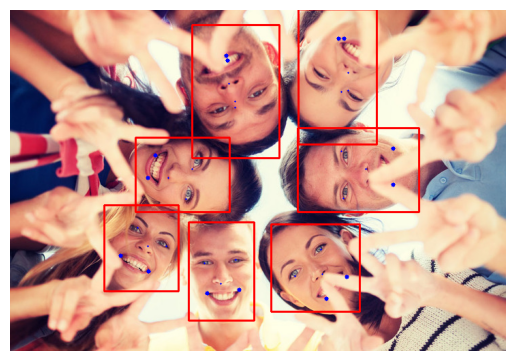

In [10]:
# 값들을 정수형으로 변환해서 tuple로 묶어서 반환
def int_tuple(t) :
    return tuple(int(x) for x in t)
for key in faces :
    indentity = faces[key]
    score = indentity["score"]
    face_area = indentity["facial_area"]
    landmarks = indentity["landmarks"]
    cv2.circle(img, int_tuple(landmarks["right_eye"]), 3, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["left_eye"]), 3, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["nose"]), 1, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_right"]), 3, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_left"]), 3, (0, 0, 255), -1)
    cv2.rectangle(img, (face_area[2], face_area[3]),
                       (face_area[0], face_area[1]), (255, 0, 0), 2)
plt.imshow(img)
plt.axis("off")

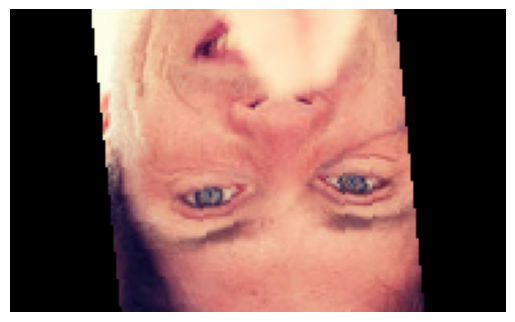

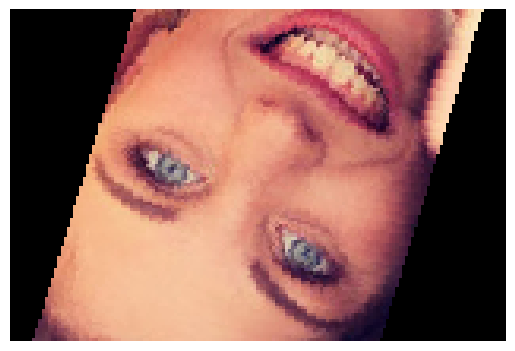

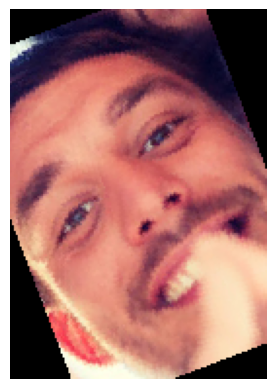

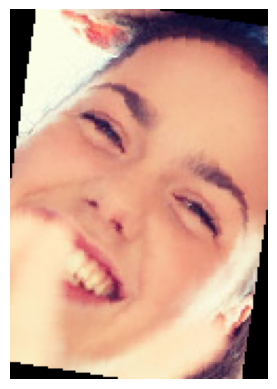

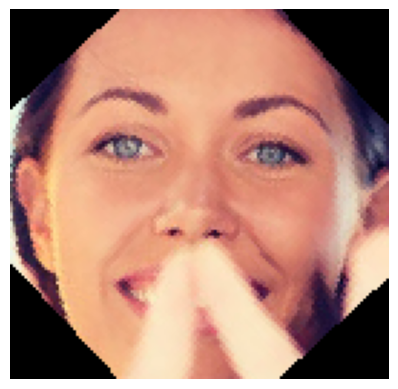

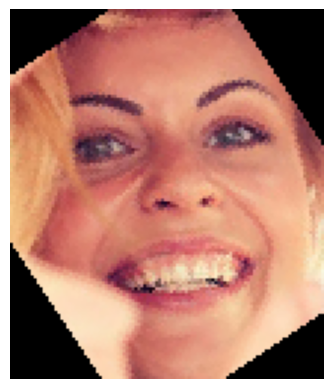

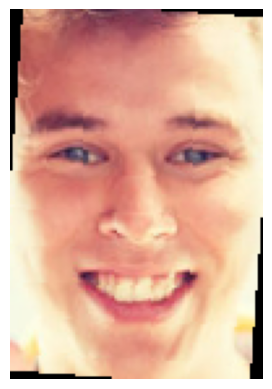

In [11]:
#얼굴 영역만 출력
img = cv2.imread("./image/faces4.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces = RetinaFace.extract_faces(img)

for face in faces :
    plt.imshow(face)
    plt.axis('off')
    plt.show()

## YuNet

- 2021년 10월 발표
- CNN기반 얼굴 탐지기로 가볍고 빠름 (모델이 MB 미만)
- 백본으로 mobilenet을 채택하고 총 85,000 개의 매개 변수를 포함
- 정면얼굴이 아닌 경우에도 잘 동작
- 참고 : https://github.com/opencv/opencv_zoo/tree/master/models/face_detection_yunet
- 모델 훈련 : https://github.com/ShiqiYu/libfacedetection.train

[[261.74802   316.10962    99.27763   135.3479    286.74945   371.71716
  334.9853    370.2391    311.7698    399.31506   292.49408   418.89685
  331.59976   417.64572     0.9321882]
 [386.5807    327.1393    112.2504    110.61236   418.757     398.48407
  437.0759    364.34506   446.63916   394.11285   464.25568   413.10944
  481.686     384.28238     0.9100865]]


(-0.5, 727.5, 500.5, -0.5)

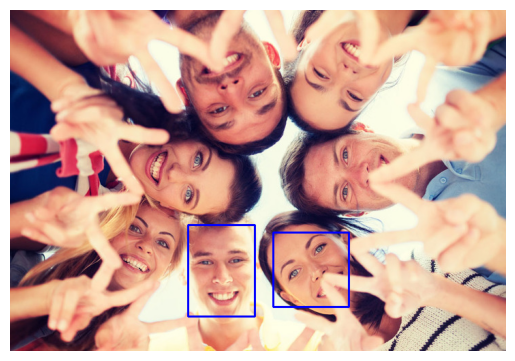

In [32]:
import numpy as np
detector = cv2.FaceDetectorYN.create('./model/face_detection_yunet_120x160.onnx', "",(0,0))

img = cv2.imread('./image/faces4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w, h, _ = img.shape

detector.setInputSize((h,w))

# 얼굴영역 (x, y, w, h), 왼쪽 눈좌표, 오른쪽 눈좌표, 코좌표, 왼쪽입술좌표, 오른쪽 입술좌표
_, faces = detector.detect(img)

print(faces)

for face in faces:
    box = list(map(int, face[:4]))
    
    cv2.rectangle(img, box, (0,0,255),2)
    
plt.imshow(img)
plt.axis("off")

## 얼굴인식

- 실시간 오픈 소스 얼굴인식 소프트웨어
  - 딥 페이스 : https://github.com/serengil/deepface?ref=hackernoon.com
    - FaceNet 및 InsightFace와 같은 다양한 얼굴 인식 방법을 지원
    - Python 개발자라면 시작하기 쉽지만 다른 사람들이 통합하기 어려움 
  - CompareFace : https://github.com/exadel-inc/CompreFace
    - REST API를 사용하면 사전 기계 학습 기술 없이도 시스템에 쉽게 통합 가능
    - 확장 가능하므로 여러 비디오 스트림에서 얼굴을 동시에 인식 가능
    - FaceNet과 InsightFace 선택 가능
    - 현재 개발 중
  - face_recognition : https://github.com/ageitgey/face_recognition?ref=hackernoon.com
    - 인기있는 API이지만 큰 개선 사항이 없고 상당히 오래된 얼굴 인식 모델을 사용
  - FaceNet : https://github.com/davidsandberg/facenet?ref=hackernoon.com
    - 정확도가 매우 높은 API지만 개선이 없음
  - InsightFace : https://github.com/deepinsight/insightface?ref=hackernoon.com
    - 얼굴 감지를 위해 가장 최근의 정확한 얼굴 인식 방법 중 하나
    - LetinaFace 및 SubCenter-ArcFace를 지원
    - 사용하기 쉽지 않다는 단점
  - InsightFace-REST : https://github.com/SthPhoenix/InsightFace-REST?ref=hackernoon.com
    - 2021년부터 생성된 API로 인식속도 향상 버전
    - 얼굴 임베딩만 제공하므로 분류기는 따로 만들어야 함

### face recognition 기반 이미지 내 얼굴 인식

- face_recognition : 업데이터 중지, 오래된 모델
  - https://wiserloner.tistory.com/1123

In [12]:
!pip install face_recognition

In [20]:
import face_recognition as fr
import matplotlib.pyplot as plt

imgElon1 = cv2.imread('./image/face_info/Elon1.jpg')
imgElon1 = cv2.cvtColor(imgElon1, cv2.COLOR_BGR2RGB)
imgElon2 = cv2.imread('./image/face_info/Elon2.jpg')
imgElon2 = cv2.cvtColor(imgElon2, cv2.COLOR_BGR2RGB)
imgBill1 = cv2.imread('./image/face_info/Bill.jpg')
imgBill1 = cv2.cvtColor(imgBill1, cv2.COLOR_BGR2RGB)
imgBill2 = cv2.imread('./image/face_info/Bill2.jpg')
imgBill2 = cv2.cvtColor(imgBill2, cv2.COLOR_BGR2RGB)

[(142, 340, 365, 117)]
[(47, 154, 121, 79)]
[(139, 572, 325, 386)]
[(118, 366, 304, 180)]


(-0.5, 407.5, 599.5, -0.5)

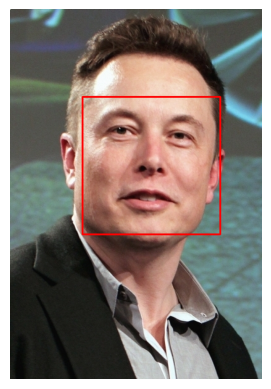

In [21]:
# 얼굴 영역 검출
faceElon1 = fr.face_locations(imgElon1)
faceElon2 = fr.face_locations(imgElon2)
faceBill1 = fr.face_locations(imgBill1)
faceBill2 = fr.face_locations(imgBill2)

print(faceElon1)
print(faceElon2)
print(faceBill1)
print(faceBill2)

cv2.rectangle(imgElon1, (faceElon1[0][3], faceElon1[0][0]),
              (faceElon1[0][1], faceElon1[0][2]), (255,0,0), 2)

plt.imshow(imgElon1)
plt.axis('off')

In [22]:
encodeElon1 = fr.face_encodings(imgElon1)[0]
encodeElon2 = fr.face_encodings(imgElon2)[0]
encodeBill1 = fr.face_encodings(imgBill1)[0]
encodeBill2 = fr.face_encodings(imgBill2)[0]

print(encodeElon1)

[-0.03573595  0.12669764  0.09741475 -0.06837698 -0.16953865  0.04171516
 -0.06375509 -0.11925824  0.11764278 -0.03002577  0.24387522 -0.11042562
 -0.24236558 -0.01872728  0.00842772  0.11831872 -0.16038226 -0.09301659
 -0.02609107 -0.11996772  0.11511208  0.07889864  0.02168841 -0.02738375
 -0.0999767  -0.32544956 -0.11040344 -0.06963696  0.16689156 -0.04767014
  0.01042473  0.01583461 -0.13477604 -0.04238464  0.05281644  0.01509207
 -0.08951137 -0.09877057  0.13563097 -0.02486982 -0.1747264  -0.01585595
  0.0160025   0.21798384  0.15434542  0.07007504  0.03121785 -0.08481091
  0.03344747 -0.24443434  0.08059632  0.19132942  0.04881309  0.00372468
  0.16057384 -0.13871513 -0.00537181  0.22318985 -0.18477669  0.10820308
  0.08423566 -0.0682556  -0.00843652 -0.11223617  0.18155779  0.08574386
 -0.07687552 -0.16796255  0.2083935  -0.05256445 -0.12065977  0.11139869
 -0.12872371 -0.16284652 -0.28363454 -0.01703719  0.46953169  0.07846301
 -0.2050752   0.01402696 -0.02090216  0.02441761  0

In [23]:
# 얼굴 인식 (얼굴 비교)
result1 = fr.compare_faces([encodeElon1], encodeElon2)
print(result1)

result2 = fr.compare_faces([encodeBill1], encodeBill2)
print(result2)

result3 = fr.compare_faces([encodeBill1], encodeElon1)
print(result3)

result4 = fr.compare_faces([encodeElon1], encodeBill2)
print(result4)

[True]
[True]
[False]
[False]


In [24]:
# 정확도 분석
conf1 = fr.face_distance([encodeElon1], encodeElon2)
print(conf1)

conf2 = fr.face_distance([encodeBill1], encodeBill2)
print(conf2)

conf3 = fr.face_distance([encodeBill1], encodeElon1)
print(conf3)

conf4 = fr.face_distance([encodeElon1], encodeBill2)
print(conf4)

[0.37054803]
[0.52400202]
[0.69466841]
[0.74141173]


### 동영상 내의 얼굴 인식 

- 인코딩된 얼굴 데이터를 읽어와서 누구인지 인식하고 표시

In [28]:
import cv2
import numpy as np
import face_recognition as fr
import os
# 얼굴 특징을 추출하는 함수
def encodeFun(img_paths) :
    encode_list = []
    for img_path in img_paths :
        encode = fr.face_encodings(img_path)[0]
        encode_list.append(encode)
    return encode_list
path = "./image/face_info/"
# 이미지 데이터베이스의 이미지 리스트
images = []
# 이미지 라벨
className = []
# 폴더의 이미지 목록 가져오기
myList = os.listdir(path)
# 이미지 목록을 읽어서 파일명과 클래스 이름을 저장
for c in myList :
    curImg = cv2.imread(f"{path}/{c}")
    #curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    images.append(curImg)
    # 파일명에서 확장자를 제거하고 파일명만 클래스이름으로 저장
    className.append(os.path.splitext(c)[0])
# 폴더에 있는 얼굴이미지 인코딩 (얼굴 DB)
encodeListKnown = encodeFun(images)
print(className)
cap = cv2.VideoCapture("./image/ellon.mp4")
while cap.isOpened() :
    ret, frame = cap.read()
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if not ret :
        continue
    # 얼굴 크기를 25% 크기로 변환
    imgS = cv2.resize(frame, (0, 0), None, 0.25, 0.25)
    # 동영상에서 얼굴 위치정보를 추출하고 해당 얼굴을 비교하기 위해 인코딩
    faceCurFrame = fr.face_locations(imgS)
    encodesCurFrame = fr.face_encodings(imgS, faceCurFrame)
    # 동영상의 얼굴과 얼굴 DB의 정보를 비교
    for encodeFace, faceLoc in zip(encodesCurFrame, faceCurFrame) :
        matches = fr.compare_faces(encodeListKnown, encodeFace)
        faceDis = fr.face_distance(encodeListKnown, encodeFace)
        # 거리값이 최소인 값의 인덱스를 반환
        matchindex = np.argmin(faceDis)
        # DB의 얼굴과 동일한 얼굴이 있다면
        if matches[matchindex] :
            y1, x2, y2, x1 = faceLoc
            # 25%로 줄였기 때문에 좌표를 원래대로 복구
            y1, x2, y2, x1 =  y1*4, x2*4, y2*4, x1*4
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, className[matchindex], (x1 + 6, y2 - 6),
                        cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow("detect face", frame)
    key = cv2.waitKey(1)
    if key == 49 :
        break
cap.release()
cv2.destroyAllWindows()

['Bill', 'Bill2', 'Elon1', 'Elon2']


### 딥페이스 기반 얼굴인식

- 딥페이스 
  - 다양한 얼굴 모델 사용 사용 가능 

In [29]:
!pip install deepface

     ---------------------------------------- 65.0/65.0 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 87.7/87.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115926 sha256=995496236e34a9cd41c475393b40e3bfdc089cfd276862ec8fdb4b3cf238a722
  Stored in directory: c:\users\ai\appdata\local\pip\cache\wheels\8a\67\fb\2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [34]:
from deepface import DeepFace
face1 = './image/face_info/Elon2.jpg'
face2 = './image/face_info/Bill.jpg'
# 사용할 모델 종류
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace",
          "DeepFace", "DeepID", "ArcFace", "Dlib"]
# 평가 방법
metrics = ["cosine", "euclidean", "euclidean_l2"]
# 두 얼굴쌍 비교
result = DeepFace.verify(img1_path = face1, img2_path =face2, model_name=models[0],
                         distance_metric=metrics[0])
result

1/1 [==============================] - 0s 141ms/step


{'verified': False,
 'distance': 0.4410349235890656,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [32]:
# 동일한 얼굴을 DB에서 검색
face1 = './image/face_info/Elon1.jpg'

df = DeepFace.find(img_path=face1, db_path='./image/face_info')
df

1/1 [==============================] - 0s 158ms/step


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [33]:
result = DeepFace.analyze(img_path=face1,
                         actions=['age','gender','race','emotion'])
result

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\AI\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:03<00:00, 1.76MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\AI\.deepface\weights\age_model_weights.h5
100%|████████████████████████████████████████████████████████████████████████████████| 539M/539M [11:26<00:00, 785kB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\AI\.deepface\weights\gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [06:30<00:00, 1.38MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\AI\.deepface\weights\race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [06:53<00:00, 1.30MB/s]
Action: age:   0%|                                                                               | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 294ms/step


Action: gender:  25%|█████████████████                                                   | 1/4 [00:00<00:01,  2.57it/s]

1/1 [==============================] - 0s 272ms/step


Action: race:  50%|███████████████████████████████████                                   | 2/4 [00:00<00:00,  2.90it/s]

1/1 [==============================] - 0s 259ms/step


Action: emotion:  75%|██████████████████████████████████████████████████▎                | 3/4 [00:00<00:00,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.44it/s]


{'age': 38,
 'region': {'x': 83, 'y': 85, 'w': 285, 'h': 285},
 'gender': 'Man',
 'race': {'asian': 0.7866318337619305,
  'indian': 0.11871668975800276,
  'black': 0.008891549805412069,
  'white': 92.83609986305237,
  'middle eastern': 2.6793882250785828,
  'latino hispanic': 3.570267930626869},
 'dominant_race': 'white',
 'emotion': {'angry': 2.754286354544888e-07,
  'disgust': 1.7854786388531857e-11,
  'fear': 96.16597294807434,
  'happy': 0.004330866067903116,
  'sad': 1.6190719520636776e-05,
  'surprise': 0.7651763968169689,
  'neutral': 3.064499609172344},
 'dominant_emotion': 'fear'}

In [37]:
DeepFace.stream(db_path='./image/face_info/')

DeepFace.stream(
    db_path="./image/face_info/",
    model_name='Facenet',
    detector_backend='opencv',
    distance_metric='cosine'
)

Detector backend is  opencv
VGG-Face  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  0.0009970664978027344  seconds


Finding embedding for Bill.jpg:   0%|                                                            | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 154ms/step


Finding embedding for Bill2.jpg:  25%|████████████▊                                      | 1/4 [00:00<00:00,  4.22it/s]

1/1 [==============================] - 0s 127ms/step


Finding embedding for Elon1.jpg:  50%|█████████████████████████▌                         | 2/4 [00:00<00:00,  4.75it/s]

1/1 [==============================] - 0s 141ms/step


Finding embedding for Elon2.jpg:  75%|██████████████████████████████████████▎            | 3/4 [00:00<00:00,  4.71it/s]

1/1 [==============================] - 0s 122ms/step


Finding embedding for Elon2.jpg: 100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.87it/s]


Embeddings found for given data set in  0.8238377571105957  seconds
1/1 [==============================] - 0s 137ms/step
Detector backend is  opencv
facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\AI\.deepface\weights\facenet_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 92.2M/92.2M [00:27<00:00, 3.38MB/s]


Facenet  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  0.0019965171813964844  seconds


Finding embedding for Bill.jpg:   0%|                                                            | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


Finding embedding for Bill2.jpg:  25%|████████████▊                                      | 1/4 [00:01<00:04,  1.33s/it]

1/1 [==============================] - 0s 31ms/step


Finding embedding for Elon1.jpg:  50%|█████████████████████████▌                         | 2/4 [00:01<00:01,  1.64it/s]

1/1 [==============================] - 0s 31ms/step


Finding embedding for Elon2.jpg:  75%|██████████████████████████████████████▎            | 3/4 [00:01<00:00,  2.60it/s]

1/1 [==============================] - 0s 47ms/step


Finding embedding for Elon2.jpg: 100%|███████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.05it/s]


Embeddings found for given data set in  1.9524061679840088  seconds


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


(([], []), ([], []))

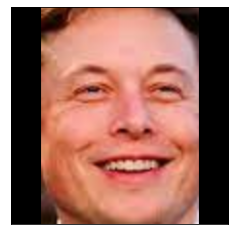

In [20]:
#실습

In [21]:
#실습

[-0.8037726879119873,
 -0.8301395177841187,
 -0.19252946972846985,
 0.0031721368432044983,
 0.5530081987380981,
 -0.39790505170822144,
 -0.11311750113964081,
 0.7511011362075806,
 0.5498688817024231,
 0.14239738881587982,
 0.39171069860458374,
 -0.23487146198749542,
 -0.09491189569234848,
 -0.2383573055267334,
 0.013013623654842377,
 -0.34418928623199463,
 -0.7398867607116699,
 -0.5003213882446289,
 -0.873335599899292,
 -0.19146721065044403,
 -0.21822857856750488,
 -0.07101642340421677,
 0.9409738183021545,
 0.5532684326171875,
 0.5046333074569702,
 -0.1895720362663269,
 0.4241003394126892,
 0.2785875201225281,
 -0.8767327070236206,
 -0.9953244924545288,
 -0.6103775501251221,
 0.024905435740947723,
 -0.4949001669883728,
 0.5554746389389038,
 0.41378992795944214,
 0.6076474189758301,
 0.06129841133952141,
 -0.7089925408363342,
 0.3962189555168152,
 -0.6193293333053589,
 -0.3435373306274414,
 -0.07313559204339981,
 -0.49894681572914124,
 -0.3144562840461731,
 0.06035161763429642,
 -0.438

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[22차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○            
        </font></td></tr>   
</table>